# wavelength 0.65nm

# there is a mismatch between the scmt sim and the fullwave. 
# seems like for lam = 1.55 it works, because the prop_dis is much larger than the height of waveguide.

In [1]:
import sys
module_path = 'C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT'
sys.path.insert(1, module_path)
import Meta_SCMT
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
GP = {
    'dim' : 1, #dim : 1 or 2.
    'modes' : 1, #number of modes with in a single waveguide. modes <= 2 is usually good enough.
    'period' : 0.24,
    'res' : 20, #resolution within one period
    'downsample_ratio': 1, #between (0, 1] for the output periodic resolution, it will be int(round(downsample_ratio * res))
    'wh' : 0.8, #waveguide height
    'lam' : 0.65,
    'n_sub' : 1.46, #the refractive index of substrate.
    'n_wg' : 2.27,# the refractive index of waveguide
    'h_min' : 0.03, #h_min, and h_max define the range of the width of waveguide.
    'h_max' : 0.23,
    'dh' : 0.01, #the step size of h.
    'path' : "sim_cache_650nm/", #the inter state store path            
}
sim = Meta_SCMT.Sim(**GP)

# step 4.1 we do a fullwave simulation using Tidy3d to validate our forward process.

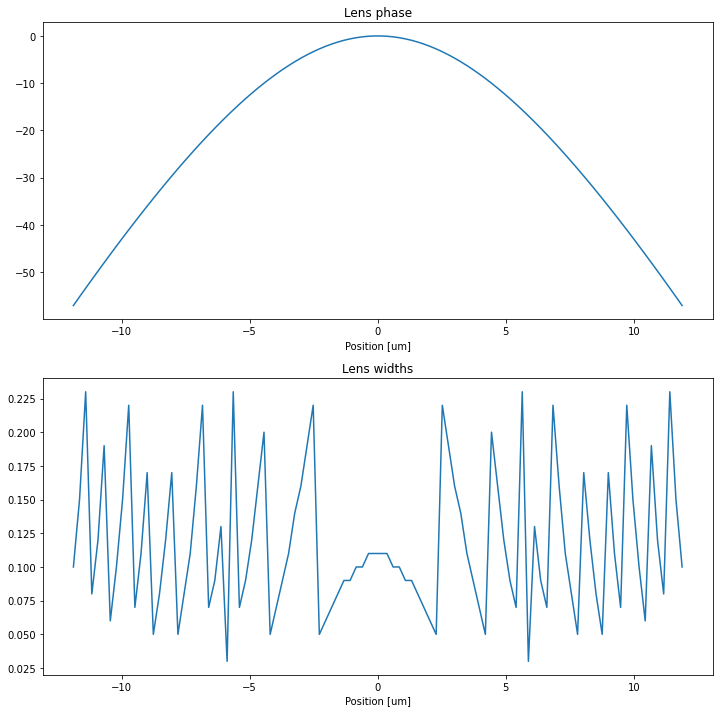

In [3]:
N = 100
theta_deg = 10
theta = math.radians(theta_deg)
NA = 0.8
prop_dis = 0.5 * N * GP['period'] * np.sqrt((1 - NA**2)/NA**2)
phases, wgs = sim.PBA.design_lens(N, prop_dis, load = True)
#np.save(f"PBA_lens_N{N}_lam{GP['lam']}um.npy", wgs)
#wgs = np.random.uniform(GP['h_min'], GP['h_max'], (N,))
#np.save(f"random_wgs2_N{N}_lam{GP['lam']}um.npy", wgs)
#wgs = np.load(f"random_wgs2_N{N}_lam{GP['lam']}um.npy")

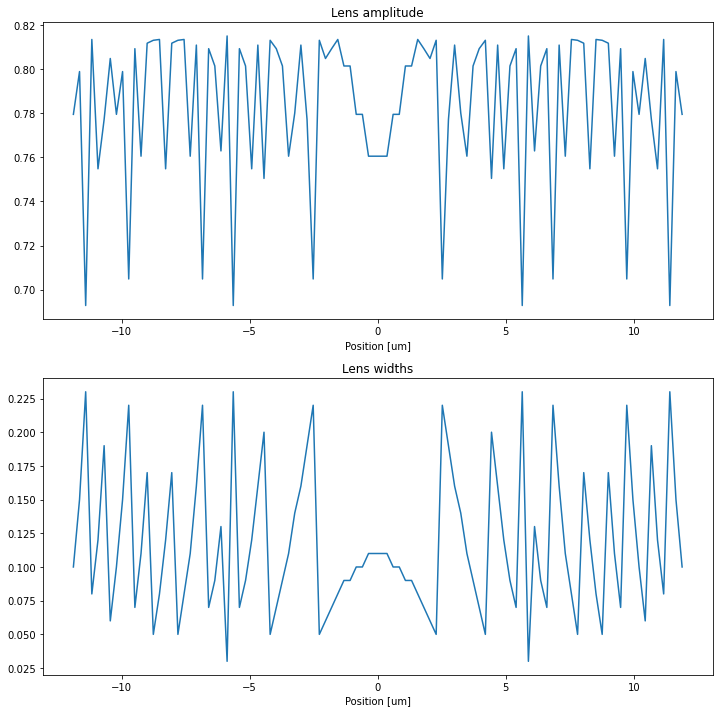

In [4]:
amps = sim.PBA.width_to_amp(wgs, sim.GP.period, load = True, vis = True)

coo_sparse generated.
coo_sparse generated.
dis model input generated.
initialized by loaded h_paras.


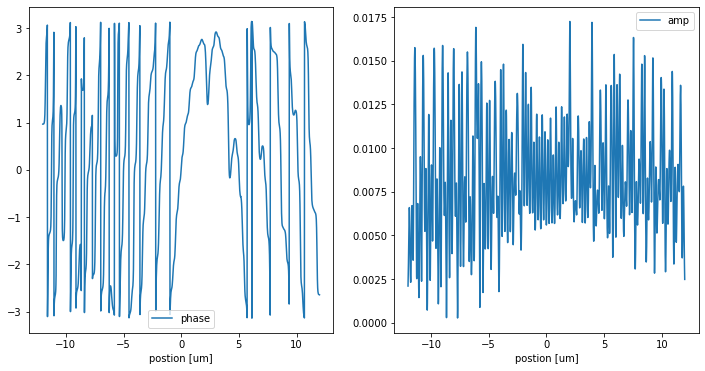

In [5]:
sim.scmt.init_model(N, prop_dis, COUPLING = True, init_hs= wgs, far_field= False)
E_out =sim.scmt.forward(theta = theta * 1.5)
#np.save("E_out_correct_freespace2_wg_coupling.npy", E_out)
sim.scmt.vis_field(E_out)
E_scmt = E_out

coo_sparse generated.
coo_sparse generated.
dis model input generated.
f_kernel generated.
initialized by loaded h_paras.


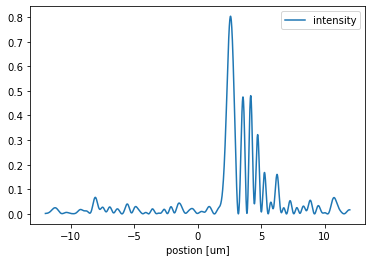

In [6]:
sim.scmt.init_model(N, prop_dis, COUPLING = True, init_hs= wgs, far_field= True)
E_out =sim.scmt.forward(theta = theta * 1.5)
I1_far = np.abs(E_out)**2
sim.scmt.vis_field(I1_far)

coo_sparse generated.
coo_sparse generated.
dis model input generated.
initialized by loaded h_paras.


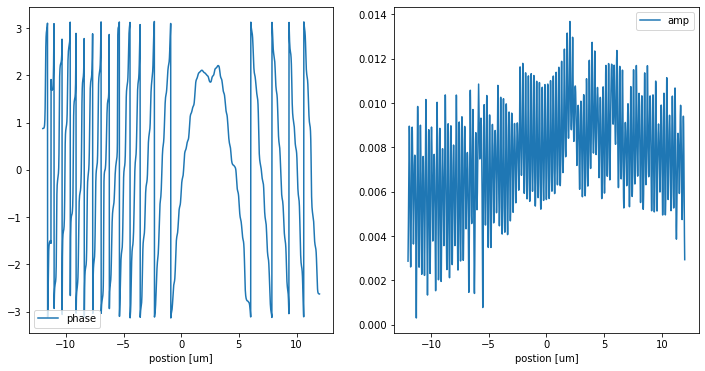

In [7]:
sim.scmt.init_model(N, prop_dis, COUPLING = False, init_hs= wgs, far_field= False)
E_out =sim.scmt.forward(theta = theta * 1.5)
sim.scmt.vis_field(E_out)
E_no_coupling = E_out

# fullwave

[20:46:37] INFO     Using client version: 1.7.1                                                      ]8;id=598508;file://C:\Users\94735\AppData\Roaming\Python\Python38\site-packages\tidy3d\__init__.py\__init__.py]8;;\:]8;id=419177;file://C:\Users\94735\AppData\Roaming\Python\Python38\site-packages\tidy3d\__init__.py#95\95]8;;\

C:/Users/94735/OneDrive - UW-Madison/My Projects/CMT_and_inverse_design/Meta_SCMT\Meta_SCMT\fullwave_1D.py:203: UserWarning: Fullwave is expensive and slow. Only do fullwave on small devices. And low resolution can be inaccurate.
  warnings.warn(


Fullwave resolution: 100
numerical aperture: 0.81
total running time: 2.168166617840596e-12
type='PlaneWave' center=(0.0, 0.0, -5.399999999999999) size=(inf, inf, 0.0) source_time=GaussianPulse(amplitude=1.0, phase=0.0, type='GaussianPulse', freq0=461219166355378.44, fwidth=46121916635537.84, offset=5.0) name=None direction='+' angle_theta=0.17453292519943295 angle_phi=0.0 pol_angle=1.5707963267948966


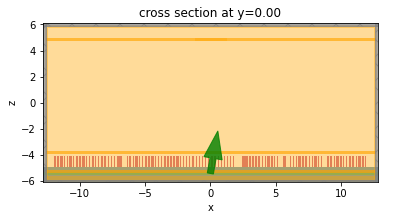

In [8]:
sim.fullwave.init_sim(prop_dis, N, wgs, res = 100, theta = theta, backend = 'tidy3d')

In [19]:
sim.fullwave.upload(task_name="Feb26_2023_1D_lens_wgs_res100_N" + str(N) + "theta_" + str(theta_deg))
sim.fullwave.download(data_path="output_tidy3d/")

[11:17:25] INFO     Uploaded task 'Feb26_2023_1D_lens_wgs_res100_N100theta_10' with task_id           ]8;id=642710;file://C:\Users\94735\AppData\Roaming\Python\Python38\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=374617;file://C:\Users\94735\AppData\Roaming\Python\Python38\site-packages\tidy3d\web\webapi.py#118\118]8;;\
                    'c97ed795-332f-4911-9a02-9708e804570b'.                                                        

Output()

[11:17:28] INFO     Maximum flex unit cost: 0.20                                                      ]8;id=89188;file://C:\Users\94735\AppData\Roaming\Python\Python38\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=126915;file://C:\Users\94735\AppData\Roaming\Python\Python38\site-packages\tidy3d\web\webapi.py#253\253]8;;\

           INFO     status = queued                                                                   ]8;id=143957;file://C:\Users\94735\AppData\Roaming\Python\Python38\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=687549;file://C:\Users\94735\AppData\Roaming\Python\Python38\site-packages\tidy3d\web\webapi.py#262\262]8;;\

Output()

[11:17:29] INFO     status = preprocess                                                               ]8;id=260349;file://C:\Users\94735\AppData\Roaming\Python\Python38\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=125804;file://C:\Users\94735\AppData\Roaming\Python\Python38\site-packages\tidy3d\web\webapi.py#274\274]8;;\

[11:17:33] INFO     starting up solver                                                                ]8;id=112214;file://C:\Users\94735\AppData\Roaming\Python\Python38\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=721437;file://C:\Users\94735\AppData\Roaming\Python\Python38\site-packages\tidy3d\web\webapi.py#278\278]8;;\

[11:17:43] INFO     running solver                                                                    ]8;id=47714;file://C:\Users\94735\AppData\Roaming\Python\Python38\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=128984;file://C:\Users\94735\AppData\Roaming\Python\Python38\site-packages\tidy3d\web\webapi.py#284\284]8;;\

Output()

[11:18:47] INFO     early shutoff detected, exiting.                                                  ]8;id=614367;file://C:\Users\94735\AppData\Roaming\Python\Python38\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=600986;file://C:\Users\94735\AppData\Roaming\Python\Python38\site-packages\tidy3d\web\webapi.py#295\295]8;;\

           INFO     status = postprocess                                                              ]8;id=347833;file://C:\Users\94735\AppData\Roaming\Python\Python38\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=628914;file://C:\Users\94735\AppData\Roaming\Python\Python38\site-packages\tidy3d\web\webapi.py#301\301]8;;\

Output()

[11:19:04] INFO     status = success                                                                  ]8;id=343113;file://C:\Users\94735\AppData\Roaming\Python\Python38\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=129758;file://C:\Users\94735\AppData\Roaming\Python\Python38\site-packages\tidy3d\web\webapi.py#307\307]8;;\

load data from sever:  True


[11:19:05] INFO     downloading file "output/monitor_data.hdf5" to                                    ]8;id=425935;file://C:\Users\94735\AppData\Roaming\Python\Python38\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=819867;file://C:\Users\94735\AppData\Roaming\Python\Python38\site-packages\tidy3d\web\webapi.py#579\579]8;;\
                    "output_tidy3d/Feb26_2023_1D_lens_wgs_res100_N100theta_10/monitor_data.hdf5"                   

Output()

[11:19:40] INFO     loading SimulationData from                                                       ]8;id=558075;file://C:\Users\94735\AppData\Roaming\Python\Python38\site-packages\tidy3d\web\webapi.py\webapi.py]8;;\:]8;id=354879;file://C:\Users\94735\AppData\Roaming\Python\Python38\site-packages\tidy3d\web\webapi.py#401\401]8;;\
                    output_tidy3d/Feb26_2023_1D_lens_wgs_res100_N100theta_10/monitor_data.hdf5                     

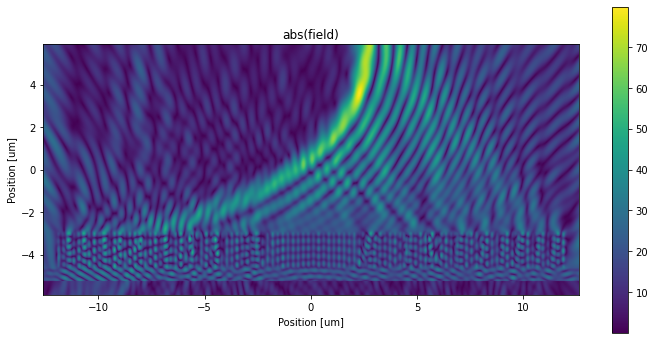

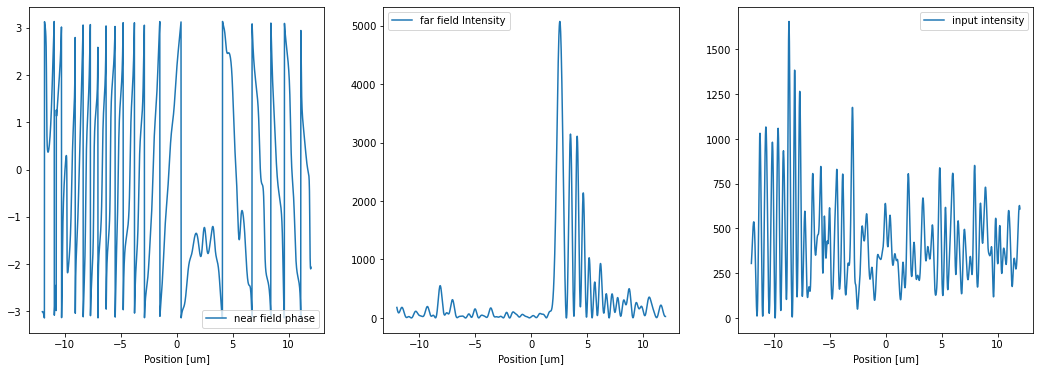

In [15]:
path = "output_tidy3d/" + "Feb26_2023_1D_lens_wgs_res100_N" + str(N)  + "theta_" + str(theta_deg)+'/monitor_data.hdf5'
Ey_xz_raw, data_in, data_near, data_far = sim.fullwave.vis_monitor(path = path)

In [16]:
Ifw_far = np.abs(data_far['Ey'])**2
x = data_far['x']

[11:39:52] WARNING  The PostScript backend does not support transparency; partially transparent   ]8;id=505338;file://C:\Users\94735\.conda\envs\pytorch1.9_env\lib\site-packages\matplotlib\backends\backend_ps.py\backend_ps.py]8;;\:]8;id=151616;file://C:\Users\94735\.conda\envs\pytorch1.9_env\lib\site-packages\matplotlib\backends\backend_ps.py#734\734]8;;\
                    artists will be rendered opaque.                                                               

           WARNING  The PostScript backend does not support transparency; partially transparent   ]8;id=201568;file://C:\Users\94735\.conda\envs\pytorch1.9_env\lib\site-packages\matplotlib\backends\backend_ps.py\backend_ps.py]8;;\:]8;id=400560;file://C:\Users\94735\.conda\envs\pytorch1.9_env\lib\site-packages\matplotlib\backends\backend_ps.py#734\734]8;;\
                    artists will be rendered opaque.                                                               

           WARNING  The PostScript backend does not support transparency; partially transparent   ]8;id=329326;file://C:\Users\94735\.conda\envs\pytorch1.9_env\lib\site-packages\matplotlib\backends\backend_ps.py\backend_ps.py]8;;\:]8;id=576597;file://C:\Users\94735\.conda\envs\pytorch1.9_env\lib\site-packages\matplotlib\backends\backend_ps.py#734\734]8;;\
                    artists will be rendered opaque.                                                               

           WARNING  The PostScript backend does not support transparency; partially transparent   ]8;id=269641;file://C:\Users\94735\.conda\envs\pytorch1.9_env\lib\site-packages\matplotlib\backends\backend_ps.py\backend_ps.py]8;;\:]8;id=893237;file://C:\Users\94735\.conda\envs\pytorch1.9_env\lib\site-packages\matplotlib\backends\backend_ps.py#734\734]8;;\
                    artists will be rendered opaque.                                                               

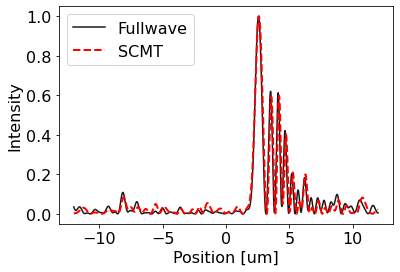

In [28]:
def normalize(x):
    x = np.abs(x)
    x = x/x.max()
    return x

plt.figure()
plt.plot(x, normalize(Ifw_far), color = 'k', alpha = 0.9,label = 'Fullwave')
plt.plot(x, normalize(I1_far), label = 'SCMT',color = 'r', linestyle = '--', linewidth = 2)
plt.legend(fontsize = 16)
plt.xlabel('Position [um]',fontsize = 16)
plt.ylabel('Intensity',fontsize = 16)
plt.yticks(fontsize=16)
plt.xticks(fontsize=16)
plt.savefig(f'far_field_Intensity_SCMT_phase_comparison_lens_tidy3d1.7_theta_{15:d}_deg.png', bbox_inches = 'tight')
plt.savefig(f'far_field_Intensity_SCMT_phase_comparison_lens_tidy3d1.7_theta_{15:d}_deg.eps', bbox_inches = 'tight')


In [17]:
# def cal_phase_dis(p1, p2):
#     N = p1.size
#     p1 = p1.reshape((N, 1))
#     p2 = p2.reshape((N, 1))
#     dis1 = (p1 - p2 - 2 * np.pi)**2
#     dis2 = (p1 - p2)**2
#     dis3 = (p1 - p2 + 2 * np.pi)**2
#     dis = np.c_[dis1, dis2, dis3]
#     dis = np.sum(np.min(dis, axis = -1))
#     return dis
# def cal_phase_dis2(p1, p2):
#     N = p1.size
#     res = 0
#     for i in range(N):
#         res += min((p1[i] - p2[i])**2, (p1[i] - p2[i] - 2 * np.pi)**2)
#     return res
def cal_phase_dis(p1, p2):
    #return np.sqrt(np.sum(np.abs(np.exp(1j * p1) - np.exp(1j * p2))**2)/p1.size)
    return np.sum(np.abs(np.exp(1j * p1) - np.exp(1j * p2)))/p1.size

In [18]:
def get_phase_offset(E1, E2):
    L2_dis = np.inf
    theta_opt = 0
    for theta in np.linspace(0, 2 * np.pi, 314 * 2):
        E_temp = E1 * np.exp(1j * theta)
        phase_temp = np.angle(E_temp)
        phase2 = np.angle(E2)
        #dis_temp = ((phase_temp - phase2)**2).sum()
        dis_temp = cal_phase_dis(phase_temp, phase2)
        if dis_temp < L2_dis:
            L2_dis = dis_temp
            theta_opt = theta
    print("minimum phase l2 dis:", L2_dis)
    return theta_opt

In [19]:
def cal_l2(E1, E2):
    ph1_offset = get_phase_offset(E1, E2)
    print("phase_offset:", ph1_offset)
    plt.figure(figsize = (20, 10))
    plt.plot(np.angle(E1 * np.exp(1j * ph1_offset)))
    plt.plot(np.angle(E2))
    p_scmt = np.angle(E1 * np.exp(1j * ph1_offset))
    p_fw = np.angle(E2)
    return cal_phase_dis(p_scmt, p_fw)

In [20]:
E_fullwave = data_near['Ey']
x = data_near['x']
E_pba = np.exp(1j * phases)
px = (np.arange(E_pba.shape[0]) - (E_pba.shape[0] - 1)/2) * sim.GP.period
E_pba = np.interp(x, px, E_pba)
amp_pba = np.interp(x, px, amps)

In [21]:
pba_offset = get_phase_offset(E_pba, E_fullwave)
scmt_offset = get_phase_offset(E_scmt, E_fullwave)
no_coupling_offset = get_phase_offset(E_no_coupling, E_fullwave)
phase_pba = np.angle(E_pba * np.exp(1j * pba_offset))
phase_scmt = np.angle(E_scmt * np.exp(1j * scmt_offset))
phase_no_coupling = np.angle(E_no_coupling * np.exp(1j * no_coupling_offset))
phase_fw = np.angle(E_fullwave)
print("mean abs phase error pba: ", cal_phase_dis(phase_pba, phase_fw))
print("mean abs phase error scmt: ", cal_phase_dis(phase_scmt, phase_fw))
print("mean abs phase error no coupling: ", cal_phase_dis(phase_no_coupling, phase_fw))

minimum phase l2 dis: 1.249946414200198
minimum phase l2 dis: 0.588958349721292
minimum phase l2 dis: 0.6876468676323577
mean abs phase error pba:  1.249946414200198
mean abs phase error scmt:  0.588958349721292
mean abs phase error no coupling:  0.6876468676323577


In [22]:
#make Fullwave close to SCMT
def preprocess_fullwave(ph_f, ph_scmt):
    for i in range(len(ph_f)):
        dis = abs(ph_f[i] - ph_scmt[i])
        dis1 = abs(ph_f[i] - ph_scmt[i] - 2 * np.pi)
        dis2 = abs(ph_f[i] - ph_scmt[i] + 2 * np.pi)
        if dis > dis1 and dis1 < 1 * np.pi:
            ph_f[i] -= 2 * np.pi
            dis = dis1
        if dis > dis2 and dis2 < 1 * np.pi:
            ph_f[i] += 2 * np.pi
            dis = dis2
    return ph_f

In [23]:
post_phase_scmt = preprocess_fullwave(phase_scmt, phase_fw)

[12:23:54] WARNING  The PostScript backend does not support transparency; partially transparent   ]8;id=422394;file://C:\Users\94735\.conda\envs\pytorch1.9_env\lib\site-packages\matplotlib\backends\backend_ps.py\backend_ps.py]8;;\:]8;id=739975;file://C:\Users\94735\.conda\envs\pytorch1.9_env\lib\site-packages\matplotlib\backends\backend_ps.py#734\734]8;;\
                    artists will be rendered opaque.                                                               

           WARNING  The PostScript backend does not support transparency; partially transparent   ]8;id=977363;file://C:\Users\94735\.conda\envs\pytorch1.9_env\lib\site-packages\matplotlib\backends\backend_ps.py\backend_ps.py]8;;\:]8;id=681110;file://C:\Users\94735\.conda\envs\pytorch1.9_env\lib\site-packages\matplotlib\backends\backend_ps.py#734\734]8;;\
                    artists will be rendered opaque.                                                               

           WARNING  The PostScript backend does not support transparency; partially transparent   ]8;id=565997;file://C:\Users\94735\.conda\envs\pytorch1.9_env\lib\site-packages\matplotlib\backends\backend_ps.py\backend_ps.py]8;;\:]8;id=546218;file://C:\Users\94735\.conda\envs\pytorch1.9_env\lib\site-packages\matplotlib\backends\backend_ps.py#734\734]8;;\
                    artists will be rendered opaque.                                                               

           WARNING  The PostScript backend does not support transparency; partially transparent   ]8;id=572196;file://C:\Users\94735\.conda\envs\pytorch1.9_env\lib\site-packages\matplotlib\backends\backend_ps.py\backend_ps.py]8;;\:]8;id=679966;file://C:\Users\94735\.conda\envs\pytorch1.9_env\lib\site-packages\matplotlib\backends\backend_ps.py#734\734]8;;\
                    artists will be rendered opaque.                                                               

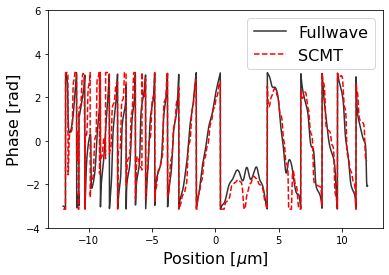

In [80]:
plt.figure()
plt.plot(x, phase_fw,color = 'k',  label = 'Fullwave', alpha = 0.8)
#plt.plot(x, phase_pba, label = 'LPA')
plt.plot(x, np.minimum(np.maximum(post_phase_scmt, -np.pi), np.pi), color = 'r', label = 'SCMT', linestyle = '--')
plt.xlabel(r'Position [$\mu$m]',fontsize = 16)
plt.ylabel('Phase [rad]',fontsize = 16)
plt.ylim(-4, 6)
plt.legend(fontsize = 16)
plt.savefig(f'near_field_SCMT_phase_comparison_lens_tidy3d1.7_theta_{15:d}_deg.png')
plt.savefig(f'near_field_SCMT_phase_comparison_lens_tidy3d1.7_theta_{15:d}_deg.eps')

In [24]:
amp_pba_norm = amp_pba / np.sqrt(np.sum(amp_pba**2))
amp_fullwave = np.abs(E_fullwave)
amp_fullwave_norm = amp_fullwave / np.sqrt(np.sum(amp_fullwave**2))
amp_scmt = np.abs(E_scmt)
amp_scmt_norm = amp_scmt / np.sqrt(np.sum(amp_scmt**2))
amp_no_coupling = np.abs(E_no_coupling)
amp_no_coupling_norm = amp_no_coupling / np.sqrt(np.sum(amp_no_coupling**2))

In [25]:
def cal_relative_err(x, ref):
    return np.sum(np.abs(x - ref)**2)/np.sum(np.abs(ref)**2)

relative error%:  19.68375377045644


[20:48:34] WARNING  The PostScript backend does not support transparency; partially transparent   ]8;id=312015;file://C:\Users\94735\.conda\envs\pytorch1.9_env\lib\site-packages\matplotlib\backends\backend_ps.py\backend_ps.py]8;;\:]8;id=925467;file://C:\Users\94735\.conda\envs\pytorch1.9_env\lib\site-packages\matplotlib\backends\backend_ps.py#734\734]8;;\
                    artists will be rendered opaque.                                                               

           WARNING  The PostScript backend does not support transparency; partially transparent   ]8;id=62251;file://C:\Users\94735\.conda\envs\pytorch1.9_env\lib\site-packages\matplotlib\backends\backend_ps.py\backend_ps.py]8;;\:]8;id=355468;file://C:\Users\94735\.conda\envs\pytorch1.9_env\lib\site-packages\matplotlib\backends\backend_ps.py#734\734]8;;\
                    artists will be rendered opaque.                                                               

           WARNING  The PostScript backend does not support transparency; partially transparent   ]8;id=8607;file://C:\Users\94735\.conda\envs\pytorch1.9_env\lib\site-packages\matplotlib\backends\backend_ps.py\backend_ps.py]8;;\:]8;id=960112;file://C:\Users\94735\.conda\envs\pytorch1.9_env\lib\site-packages\matplotlib\backends\backend_ps.py#734\734]8;;\
                    artists will be rendered opaque.                                                               

           WARNING  The PostScript backend does not support transparency; partially transparent   ]8;id=919777;file://C:\Users\94735\.conda\envs\pytorch1.9_env\lib\site-packages\matplotlib\backends\backend_ps.py\backend_ps.py]8;;\:]8;id=310672;file://C:\Users\94735\.conda\envs\pytorch1.9_env\lib\site-packages\matplotlib\backends\backend_ps.py#734\734]8;;\
                    artists will be rendered opaque.                                                               

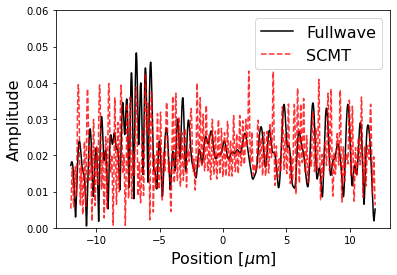

In [26]:
plt.figure()
plt.plot(x, amp_fullwave_norm, color = 'k',label = 'Fullwave')
#plt.plot(x, phase_pba, label = 'LPA')
plt.plot(x, amp_scmt_norm,color = 'r', label = 'SCMT', linestyle = '--', alpha = 0.8)
plt.xlabel(r'Position [$\mu$m]',fontsize = 16)
plt.ylabel('Amplitude',fontsize = 16)
plt.ylim(0, 0.06)
plt.legend(fontsize = 16)
print("relative error%: ", cal_relative_err(amp_scmt_norm, amp_fullwave_norm) * 100)
plt.savefig(f'near_field_SCMT_amp_comparison_lens_tidy3d1.7_theta_{15:d}_deg.png')
plt.savefig(f'near_field_SCMT_amp_comparison_lens_tidy3d1.7_theta_{15:d}_deg.eps')